<a href="https://colab.research.google.com/github/ickma2311/mycolab/blob/main/Alg/DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DP Classic Code Skeleton

1. Define the DP state:

Let dp[i] (or dp[i][j], etc.) be the optimal value (min, max, count, bool) for subproblem ending at index i.

2. Define the base case(s):

Set initial values of dp based on the smallest subproblem(s).

`dp[0] = ...`
3. Define the recurrence relation (transition):

Use previously computed states to define the current one.
```
for i in range(1, n):
    dp[i] = min/max/sum/... of dp[j] + cost/score if condition holds
```


```
# Example: 1D DP
dp = [initial_value] * (n + 1)
dp[0] = base_case

for i in range(1, n + 1):
    for j in range(possible transitions):
        if valid(j):
            dp[i] = min(dp[i], dp[j] + cost(i, j))  # or max, or +=

return dp[n] or max(dp)
```



# [Climbing Stairs](https://leetcode.com/problems/climbing-stairs/description/)

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        a,b=1,1
        for i in range(n-1):
            a,b=b,a+b
        return b


# [Best Time to Buy and Sell Stock](https://leetcode.com/problems/best-time-to-buy-and-sell-stock/description/)

You are given an array prices where prices[i] is the price of a given stock on the ith day.

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

Return the maximum profit you can achieve from this transaction. If you cannot achieve any profit, return 0.



Example 1:

Input: prices = [7,1,5,3,6,4]
Output: 5
Explanation: Buy on day 2 (price = 1) and sell on day 5 (price = 6), profit = 6-1 = 5.
Note that buying on day 2 and selling on day 1 is not allowed because you must buy before you sell.
Example 2:

Input: prices = [7,6,4,3,1]
Output: 0
Explanation: In this case, no transactions are done and the max profit = 0.


Constraints:

1 <= prices.length <= 105
0 <= prices[i] <= 104

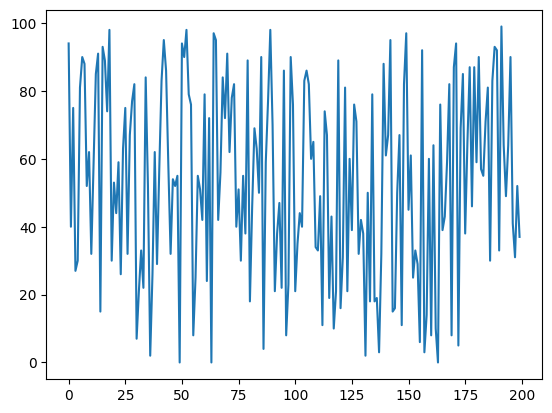

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

points=np.random.randint(0,100,200)
plt.plot(points)
plt.show()

# Look at the simulated trends,
# what we need to do is evaluate all the min to max sgements and find the best one


In [ ]:
from typing import List

class Solution:
    def maxProfit(self, prices: List[int]) -> int:

        profile=0
        buy_at=None
        for p in prices:
            # we test different segment(min->max)
            if buy_at is None or p<buy_at:
                buy_at=p
                continue
            if p-buy_at>profile:
                profile=p-buy_at
        return profile

# [Best Time to Buy and Sell Stock II](https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii/description/?envType=problem-list-v2&envId=2jbyzsd1)

Solution:
The solution is just to maximize the short time solution, if the next day price goes up, buy today and sell the next today, otherwise do nothing

$ \text{profile}=\sum_{i=0}^n \max(0,price_{i+1}-price_i) $

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        profile=0
        for m,n in zip(prices[:-1],prices[1:]):
            if n-m>0:
                profile+=n-m
        return profile

# [Triangle](https://leetcode.com/problems/triangle/description/)
For each step, you may move to an adjacent number of the row below. More formally, if you are on index i on the current row, you may move to either index i or index i + 1 on the next row.



Example 1:

Input: triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]
Output: 11
Explanation: The triangle looks like:
```
   2
  3 4
 6 5 7
4 1 8 3
```
The minimum path sum from top to bottom is 2 + 3 + 5 + 1 = 11 (underlined above).
Example 2:

Input: triangle = [[-10]]
Output: -10

In [ ]:
from collections import defaultdict


class Solution:
    def minimumTotal(self, triangle: List[List[int]]) -> int:
        dp = list()
        for m in range(len(triangle)):
            if m==0:
                dp.append(triangle[0])
                continue
            arr=[]
            for n in range(len(triangle[m])):
                if n==0 :
                    value=dp[m-1][0]
                elif n==len(triangle[m])-1:
                    value=dp[m-1][n-1]
                else:
                    value=min(dp[m-1][n-1],dp[m-1][n])
                cost=triangle[m][n]
                arr.append(value+cost)
            dp.append(arr)

        return min(dp[-1])


# [Video Stitching](https://leetcode.com/problems/video-stitching/description/)

In [ ]:
class Solution:
    def videoStitching(self, clips: List[List[int]], time: int) -> int:

        clips.sort(key=lambda x: (x[0], -x[1]))
        clips_with_index = list(enumerate(clips))
        if clips[0][0] != 0:
            return -1
        if clips[0][1] >= time:
            return 1
        i = 0
        segs = [clips_with_index[0]]
        while i < len(clips):
            choices = [
                c for c in clips_with_index[i + 1 :] if c[1][0] <= segs[-1][1][1]
            ]
            if len(choices) == 0:
                return -1
            next_ = sorted(choices, key=lambda x: x[1][1])[-1]

            segs.append(next_)
            i = next_[0]
            if next_[1][1] >= time:
                return len(segs)
        return -1


# [House Robber](https://leetcode.com/problems/house-robber/description/)

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        if len(nums) < 2:
            return max(nums)
        dp = [0] * (len(nums) + 1)
        dp[0] = 0
        dp[1] = nums[0]
        for i, num in enumerate(nums[1:], 2):
            dp[i] = max([dp[i - 2] + num, dp[i - 1]])
        return dp[-1]
